In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load Dataset

In [4]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [5]:
train_df.shape

(60000, 785)

In [6]:
test_df.shape

(10000, 785)

In [7]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [8]:
train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

#### Each row represents an grayscale image containing 784 pixels and each pixel having values in range from 0-255  
#### The column label is a discrete value in the range 0 to 9 each value representing a specific category

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Preprocess Data  
Convert each image of 784 into (28x28x1)(height x width x color_channels). Divide values by 255 to scale the values.

In [10]:
x_train = train_df.iloc[:,1:].to_numpy()
x_train = x_train.reshape([-1,28,28,1])
x_train = x_train / 255

In [11]:
y_train = train_df.iloc[:,0].to_numpy()

In [12]:
x_test = test_df.iloc[:,1:].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test / 255

In [13]:
y_test = test_df.iloc[:,0].to_numpy()

### Visualization

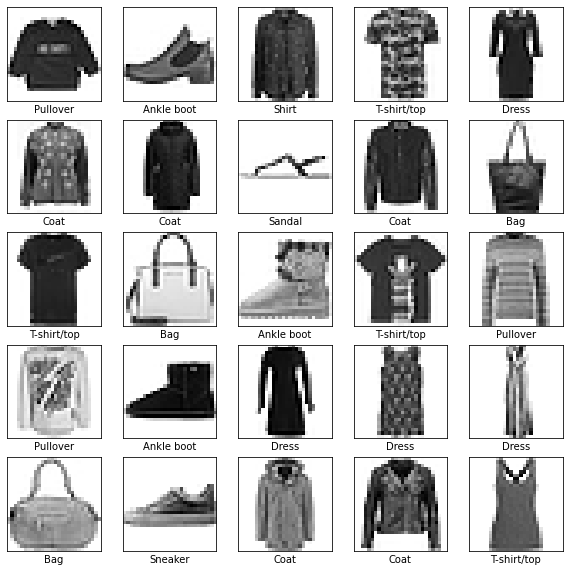

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Model Building

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

2023-05-16 21:54:22.528509: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-16 21:54:22.557145: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-16 21:54:22.557546: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 21:54:23.112943: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [16]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 32)                346144    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [17]:
model.fit(x_train,y_train,epochs=50,batch_size=1200,validation_split=0.05)

Epoch 1/50
48/48 [==============================] - 15s 301ms/step - loss: 0.9360 - accuracy: 0.6792 - val_loss: 0.5553 - val_accuracy: 0.8003
Epoch 2/50
48/48 [==============================] - 16s 330ms/step - loss: 0.4959 - accuracy: 0.8245 - val_loss: 0.4695 - val_accuracy: 0.8343
Epoch 3/50
48/48 [==============================] - 17s 350ms/step - loss: 0.4258 - accuracy: 0.8514 - val_loss: 0.4303 - val_accuracy: 0.8487
Epoch 4/50
48/48 [==============================] - 16s 339ms/step - loss: 0.3930 - accuracy: 0.8621 - val_loss: 0.3855 - val_accuracy: 0.8660
Epoch 5/50
48/48 [==============================] - 15s 306ms/step - loss: 0.3688 - accuracy: 0.8702 - val_loss: 0.3724 - val_accuracy: 0.8707
Epoch 6/50
48/48 [==============================] - 16s 341ms/step - loss: 0.3527 - accuracy: 0.8762 - val_loss: 0.3523 - val_accuracy: 0.8797
Epoch 7/50
48/48 [==============================] - 16s 335ms/step - loss: 0.3388 - accuracy: 0.8817 - val_loss: 0.3397 - val_accuracy: 0.8817

### Evaluation

In [18]:
evaluation = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2382 - accuracy: 0.9154


In [19]:
print(f"Accuracy: {evaluation[1]}")

Accuracy: 0.9154000282287598


In [20]:
y_probas = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
y_pred = y_probas.argmax(axis=-1)

In [22]:
y_pred

array([0, 1, 2, ..., 8, 8, 1])

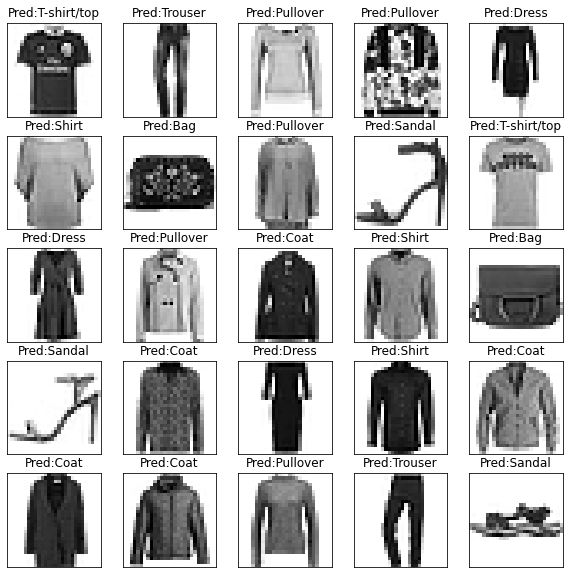

In [23]:
plt.figure(figsize=(10,10),)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
#     plt.xlabel(f"True Class:{y_test[i]}")
    plt.title(f"Pred:{class_names[y_pred[i]]}")
plt.show()

In [24]:
from sklearn.metrics import classification_report

In [25]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.87      0.85      0.86      1000
     class 1       0.98      0.98      0.98      1000
     class 2       0.88      0.87      0.88      1000
     class 3       0.92      0.93      0.92      1000
     class 4       0.87      0.90      0.89      1000
     class 5       0.98      0.98      0.98      1000
     class 6       0.77      0.76      0.77      1000
     class 7       0.97      0.92      0.94      1000
     class 8       0.98      0.98      0.98      1000
     class 9       0.93      0.98      0.95      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

